# **Heart Stroke Predictor Project**

#### Some common data preprocessing steps that are applied:

1. Filling or removing missing data

2. Removing outliers

3. Encoding categorical data

4. Balancing data

5. Splitting the dataset into training and test sets

6. Normalizing training dataset only

### Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Projects/(Done) Heart Attack Predictor Website/heart_disease.csv')

df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [ ]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


### NULL values graph

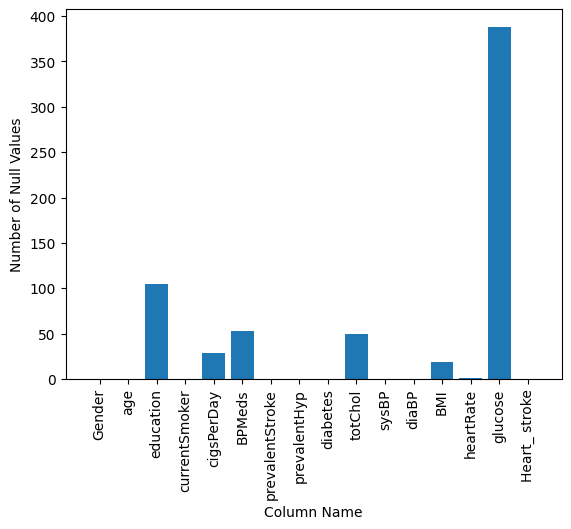

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Create a bar graph of the null value counts
plt.bar(null_counts.index, null_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Number of Null Values')
plt.show()

In [ ]:
import pandas as pd

# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Print the null value counts for each column
print(null_counts)

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64


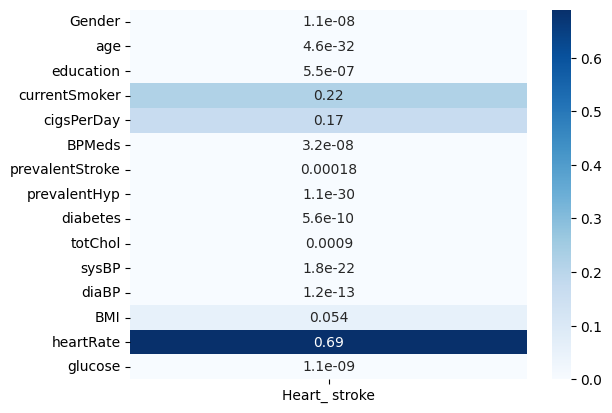

In [ ]:
# Import pandas and scipy.stats
import pandas as pd
from scipy.stats import chi2_contingency

# Create an empty list to store the correlation values
correlations = []

# Loop through each feature column
for column in df.columns:
  # Skip the target column
  if column == "Heart_ stroke":
    continue
  # Create a contingency table for the feature and target columns
  contingency_table = pd.crosstab(df[column], df["Heart_ stroke"])
  # Perform the chi-square test and get the p-value
  _, p_value, _, _ = chi2_contingency(contingency_table)
  # Append the p-value to the list of correlations
  correlations.append(p_value)

# Import numpy, seaborn and matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the list of p-values into a matrix
p_matrix = np.array(correlations).reshape(df.shape[1] - 1, 1)

# Create a new DataFrame with the p-values and the column names
p_df = pd.DataFrame(p_matrix, index=df.columns[:-1], columns=["Heart_ stroke"])

# Plot the heatmap with seaborn
sns.heatmap(p_df, annot=True, cmap="Blues")
plt.show()

### Dropping useless columns

In [ ]:
df = df.drop(['education', 'glucose'], axis = 1)

df

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Heart_ stroke
0,Male,39,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,No
1,Female,46,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,No
2,Male,48,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,No
3,Female,61,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,yes
4,Female,46,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,yes
4234,Male,51,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,No
4235,Female,48,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,No
4236,Female,44,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,No


### Removing rest of NULL values

In [ ]:
import pandas as pd

df = df.dropna(axis=0)

df

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Heart_ stroke
0,Male,39,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,No
1,Female,46,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,No
2,Male,48,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,No
3,Female,61,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,yes
4,Female,46,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,Male,68,0,0.0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,yes
4233,Male,50,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,yes
4234,Male,51,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,No
4236,Female,44,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,No


### Removing outliers from the data

In [ ]:
import pandas as pd

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

df = remove_outliers(df)

df

<ipython-input-10-7dd02cd9b363>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-7dd02cd9b363>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-10-7dd02cd9b363>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Heart_ stroke
0,Male,39,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,No
1,Female,46,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,No
2,Male,48,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,No
3,Female,61,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,yes
4,Female,46,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,Male,68,0,0.0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,yes
4233,Male,50,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,yes
4234,Male,51,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,No
4236,Female,44,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,No


### Applying OHE on categorical variables

In [ ]:
# Import pandas
import pandas as pd

# One hot encode the categorical variables using pandas.get_dummies()
# Use a for loop to iterate over the columns and check their data type
# Use drop_first=True to remove one column from each categorical variable
for col in df.columns:
    if df[col].dtype == object: # If the column is categorical
        df = pd.get_dummies(df, columns=[col], drop_first=True) # Apply get_dummies() to it with drop_first=True

# Print the encoded dataframe
df

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,Gender_Male,prevalentStroke_yes,Heart_ stroke_yes
0,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,1,0,0
1,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,0,0,0
2,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,1,0,0
3,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,0,0,1
4,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,68,0,0.0,0.0,1,0,176.0,168.0,97.0,23.14,60.0,1,0,1
4233,50,1,1.0,0.0,1,0,313.0,179.0,92.0,25.97,66.0,1,0,1
4234,51,1,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,1,0,0
4236,44,1,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,0,0,0


In [ ]:
df.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'Gender_Male', 'prevalentStroke_yes', 'Heart_ stroke_yes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3584 non-null   int64  
 1   currentSmoker        3584 non-null   int64  
 2   cigsPerDay           3584 non-null   float64
 3   BPMeds               3584 non-null   float64
 4   prevalentHyp         3584 non-null   int64  
 5   diabetes             3584 non-null   int64  
 6   totChol              3584 non-null   float64
 7   sysBP                3584 non-null   float64
 8   diaBP                3584 non-null   float64
 9   BMI                  3584 non-null   float64
 10  heartRate            3584 non-null   float64
 11  Gender_Male          3584 non-null   uint8  
 12  prevalentStroke_yes  3584 non-null   uint8  
 13  Heart_ stroke_yes    3584 non-null   uint8  
dtypes: float64(7), int64(4), uint8(3)
memory usage: 346.5 KB


### Balancing the dataset

In [ ]:
# Import pandas
import pandas as pd

# Import imbalanced-learn
from imblearn.over_sampling import SMOTE

# Assume you have already loaded your dataset into df variable

# Define your features and target variables
X = df.drop('Heart_ stroke_yes', axis=1) # Features are all the columns except weight
y = df['Heart_ stroke_yes'] # Target is the weight column

# Print the value counts of the target variable
print(y.value_counts())

# Balance the dataset using SMOTE
# Create an instance of the SMOTE class
sm = SMOTE()
# Fit and transform the features and target variables using fit_resample()
X_res, y_res = sm.fit_resample(X, y)

# Print the value counts of the target variable after SMOTE
print(y_res.value_counts())

0    3117
1     467
Name: Heart_ stroke_yes, dtype: int64
0    3117
1    3117
Name: Heart_ stroke_yes, dtype: int64


### Splitting dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       620
           1       0.88      0.91      0.90       627

    accuracy                           0.89      1247
   macro avg       0.89      0.89      0.89      1247
weighted avg       0.89      0.89      0.89      1247

[[541  79]
 [ 54 573]]


### Model Saving

In [ ]:
import pickle

def save_model(model, filename):
    # Save the trained model as a pickle file
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
save_model(rfc, '/content/drive/MyDrive/Projects/(Done) Heart Attack Predictor Website/model.pkl')